# 【確認課題】scikit-learn

## 前準備




### データの読み取り

scikit-learnから提供される`iris`というデータセットを読み込みます。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()

# 説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

# 目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=["target"])


### 説明変数の把握

問. `df_data` の先頭 5 行を表示しましょう。


In [20]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


問. `df_data` の行数と列数を表示しましょう。

In [5]:
df_data.shape

(150, 4)

問. `df_data` の基本特徴量を表示しましょう。


In [8]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


問. `df_data` に欠損値がないかを確認しましょう。

In [10]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 目的変数の把握

問. `df_target` のうち、ランダムに 10 行表示しましょう。


In [14]:
df_target.sample(n=10)

,target
124,2
42,0
90,1
0,0
105,2
55,1
35,0
29,0
71,1
3,0


目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


### データの可視化（Extra）

問. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。
ただし、目的変数に応じて点の色と形を変更してください。


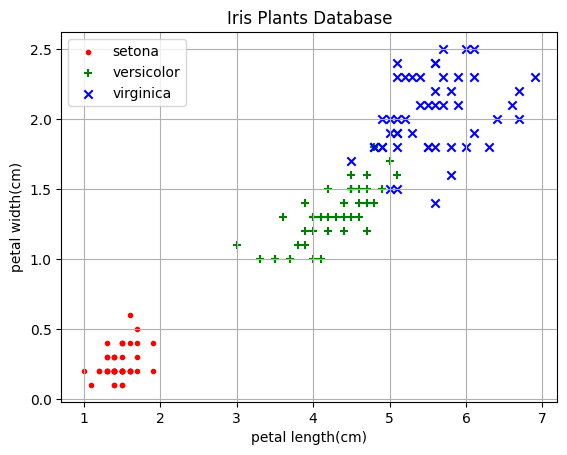

In [28]:
import matplotlib.pyplot as plt
data_extra = pd.concat([df_target, df_data], axis=1)
data_length = data_extra["petal length (cm)"]
data_width = data_extra["petal width (cm)"]
data_class = data_extra["target"]
plt.title('Iris Plants Database')
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.scatter(data_length[data_class==0], data_width[data_class==0], label='setona', marker='.', color='red')
plt.scatter(data_length[data_class==1], data_width[data_class==1], label='versicolor', marker='+', color='green')
plt.scatter(data_length[data_class==2], data_width[data_class==2], label='virginica', marker='x', color='blue',)
plt.grid()
plt.legend()
plt.show()

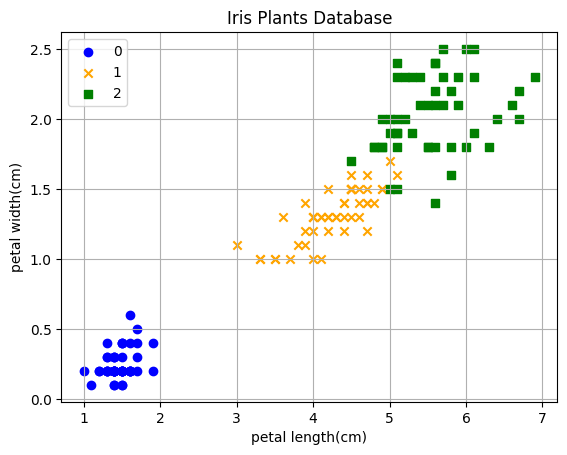

In [31]:
import matplotlib.pyplot as plt
data_extra = pd.concat([df_target, df_data], axis=1)
data_length = data_extra["petal length (cm)"]
data_width = data_extra["petal width (cm)"]
data_class = data_extra["target"]
plt.title('Iris Plants Database')
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.scatter(data_length[data_class==0], data_width[data_class==0], label='0', marker='o', color='blue')
plt.scatter(data_length[data_class==1], data_width[data_class==1], label='1', marker='x', color='orange')
plt.scatter(data_length[data_class==2], data_width[data_class==2], label='2', marker='s', color='green')
plt.grid()
plt.legend()
plt.show()

## 機械学習


### データの分割

問. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [32]:
from sklearn.model_selection import train_test_split
x=df_data
y=df_target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

問. 本当に 4:1 に分割できているか確認しましょう。


In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

### 学習

問. RandamForest の学習モデルのインスタンスを生成しましょう。


In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

問. `x_train` と `y_train` を用いて、モデルを学習させましょう。


In [37]:
model.fit(x_train, y_train)

<ipython-input-37-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier()

### 推論


問. 学習したモデルに `x_test` を入力して予測をしましょう。

In [38]:
prediction=model.predict(x_test)

問. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。


In [40]:
model.score(x_test, y_test)

1.0

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。